In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
d= pd.read_csv("/home/student/mikasa/MCustomers.csv")

In [39]:
d

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
d.isna()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [41]:
d.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
d.shape

(200, 5)

In [43]:
d.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [44]:
from sklearn.cluster import KMeans
import seaborn as sb

In [45]:
x=["Annual Income (k$)"]
y=["spending Score(1-100)"]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

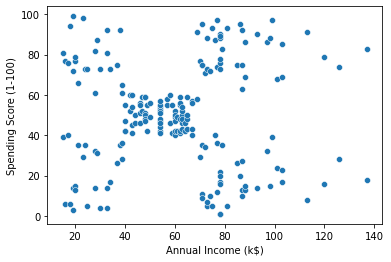

In [46]:
sb.scatterplot(data=d,x="Annual Income (k$)",y="Spending Score (1-100)")

In [51]:
x=d.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [63]:

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)


KMeans(n_clusters=3)

In [64]:
kmeans.inertia_

106348.3730621112

In [69]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [44.15447154, 49.82926829],
       [87.        , 18.63157895]])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

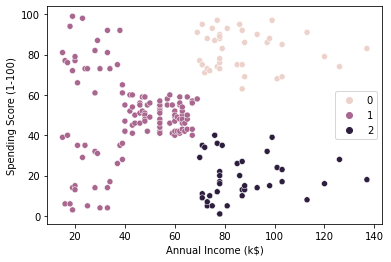

In [76]:
sb.scatterplot(data = x, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = kmeans.labels_)

In [84]:
K=range(1,10)
fits=[]
for k in K:
         model = KMeans(n_clusters = k, random_state = 0).fit(x)
         
         fits.append(model)
            


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

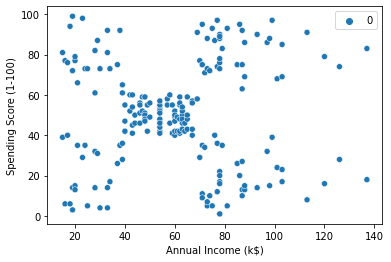

In [85]:
sb.scatterplot(data = x, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = fits[0].labels_)

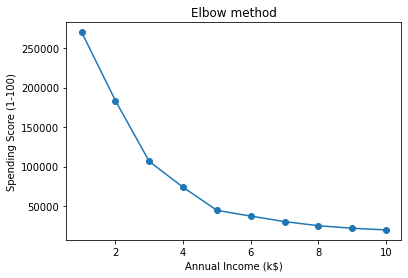

In [92]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [94]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x)

KMeans(n_clusters=5)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

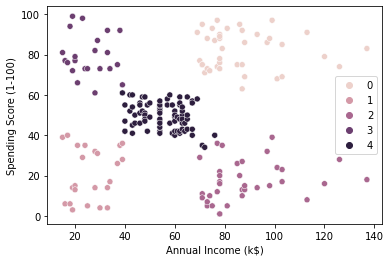

In [95]:
sb.scatterplot(data = x, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = kmeans.labels_)

In [96]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])